
## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:200%; text-align:center; border-radius:10px 10px;">EDA Exercise </p>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [12]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install lxml


Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install html5lib


Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install BeautifulSoup4

Note: you may need to restart the kernel to use updated packages.


https://hsgm.saglik.gov.tr/tr/haberler/yetkilendirilmis-covi-d-19-tani-laboratuvarlari.html

In [37]:
%pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


https://en.wikipedia.org/wiki/World_population

In [38]:
from sqlalchemy import create_engine

***Impute missing value in relationship column with "Unmaried". Also replace "Not-in-family", "Other-relative" values in this column with "Unmaried"?***

In [45]:
df= pd.read_csv("adult_eda.csv")

In [46]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


***Impute missing value in relationship column with "Unmaried". Also replace "Not-in-family", "Other-relative" values in this column with "Unmaried"?***

In [47]:
df.relationship.value_counts(dropna=False)

Husband           13193
Not-in-family      8305
NaN                5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [48]:
df["marital-status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [49]:
df.groupby("relationship")["marital-status"].value_counts(dropna=False)


relationship    marital-status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unmarried       Divorced                  1601
                Never-married              881
                Separated                  451
                Widowed                    383
                Married-spouse-absent      130
Wife            Marrie

In [50]:
df.relationship = df.relationship.replace(["Not-in-family", "Other-relative",np.nan], "Unmarried")
df.relationship


0        Unmarried
1          Husband
2        Unmarried
3          Husband
4             Wife
           ...    
32556         Wife
32557      Husband
32558    Unmarried
32559    Unmarried
32560         Wife
Name: relationship, Length: 32561, dtype: object

In [51]:
df.relationship.value_counts()


Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

***Take a look at correlation between variables and also see if there are some outliers in any of the columns.***

In [52]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.035791,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043711,0.000432,-0.010252,-0.018768
education-num,0.035791,-0.043711,1.000000,0.123682,0.079795,0.147748
capital-gain,0.077674,0.000432,0.123682,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079795,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.147748,0.078409,0.054256,1.000000


In [53]:
df.salary.replace({"<=50K": 0, ">50K":1}, inplace=True)

In [54]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0


<Axes: >

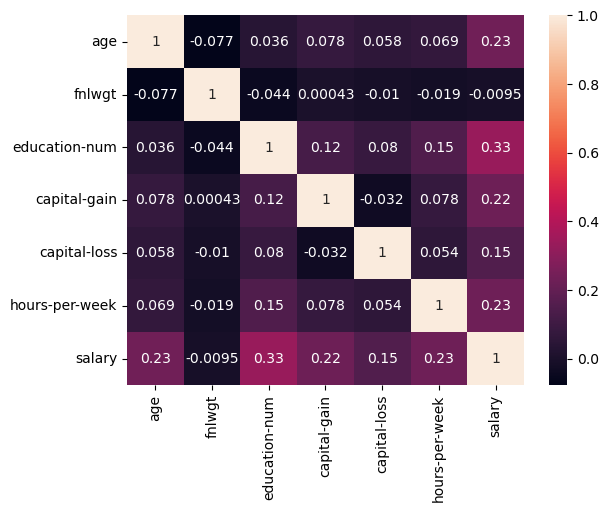

In [55]:
sns.heatmap(data=df.corr(), annot=True)

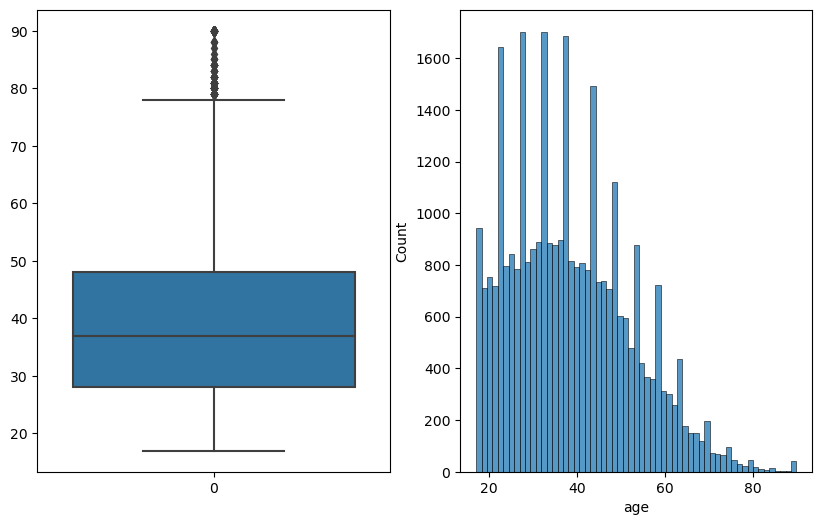

In [56]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data=df.age,whis=1.5)
plt.subplot(1,2,2)
sns.histplot(data=df.age);

In [57]:
q1 = df.age.quantile(.25)
q1

28.0

In [58]:
q3 = df.age.quantile(.75)
q3

48.0

In [59]:
iqr = q3 - q1
iqr

20.0

In [60]:
low_limit = q1 - iqr * 1.5
low_limit

-2.0

In [61]:
high_limit = q3 + iqr * 1.5
high_limit

78.0

In [62]:
df[df.age > 78]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
74,79,Private,124744,Some-college,10.0,Married-civ-spouse,Prof-specialty,Unmarried,White,Male,0,0,20,United-States,0
222,90,Private,51744,HS-grad,9.0,Never-married,Other-service,Unmarried,Black,Male,0,2206,40,United-States,0
430,80,?,107762,HS-grad,9.0,Widowed,?,Unmarried,White,Male,0,0,24,United-States,0
918,81,Self-emp-not-inc,136063,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,0
1040,90,Private,137018,HS-grad,9.0,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32277,90,Private,313749,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,0
32367,90,Local-gov,214594,7th-8th,4.0,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,0
32459,85,Private,98611,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,0
32494,82,?,403910,HS-grad,9.0,Never-married,?,Unmarried,White,Male,0,0,3,United-States,0


In [63]:
df[df.age > 78].value_counts().sum()
# Sum of >78 year old

140

**Hours Per Week**

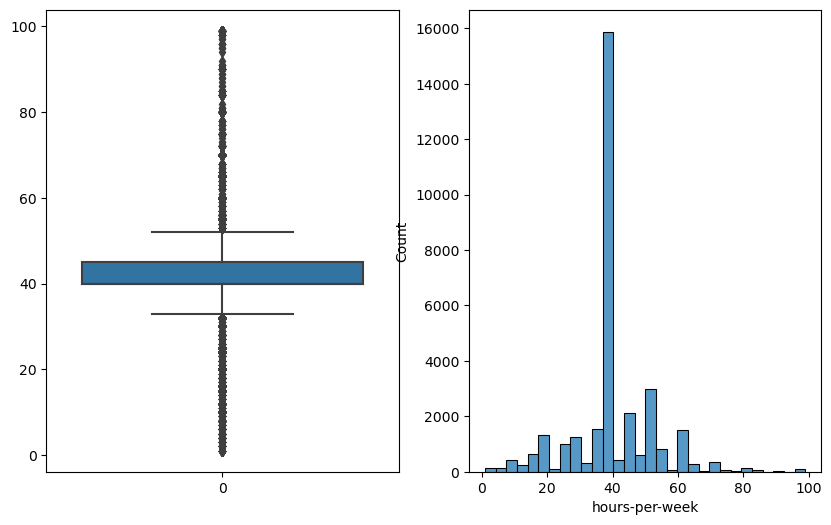

In [64]:

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data=df["hours-per-week"])
plt.subplot(1,2,2)
sns.histplot(data=df["hours-per-week"],bins=30);

In [65]:
hq1 = df["hours-per-week"].quantile(.25)
hq1

40.0

In [66]:
hq2 = df["hours-per-week"].quantile(.5)
hq2

40.0

In [67]:
hq3 = df["hours-per-week"].quantile(.75)
hq3

45.0

In [68]:
df[(df["hours-per-week"] < 32.5) | (df["hours-per-week"] > 52.5)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
6,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,0
10,37,Private,280464,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
12,23,Private,122272,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,0
20,40,Private,193524,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,31,Private,199655,Masters,14.0,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,0
32545,39,Local-gov,111499,Assoc-acdm,12.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,1
32548,65,Self-emp-not-inc,99359,Prof-school,15.0,Never-married,Prof-specialty,Unmarried,White,Male,1086,0,60,United-States,0
32553,32,Private,116138,Masters,14.0,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,0


In [69]:
df[df["hours-per-week"] == 99]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
935,37,Private,176900,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,1
1172,25,Private,404616,Masters,14.0,Married-civ-spouse,Farming-fishing,Unmarried,White,Male,0,0,99,United-States,1
1887,55,Self-emp-not-inc,184425,Some-college,10.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,1
3578,37,Self-emp-inc,382802,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,99,United-States,1
4086,50,?,174964,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30992,40,Self-emp-inc,104235,Masters,14.0,Never-married,Other-service,Unmarried,White,Male,0,0,99,United-States,0
31681,43,Private,266324,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,1
31699,43,Self-emp-not-inc,163108,Some-college,10.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,0
32469,58,Self-emp-inc,181974,Doctorate,16.0,Never-married,Prof-specialty,Unmarried,White,Female,0,0,99,?,0


**Boxplot and Histplot for all numeric features**

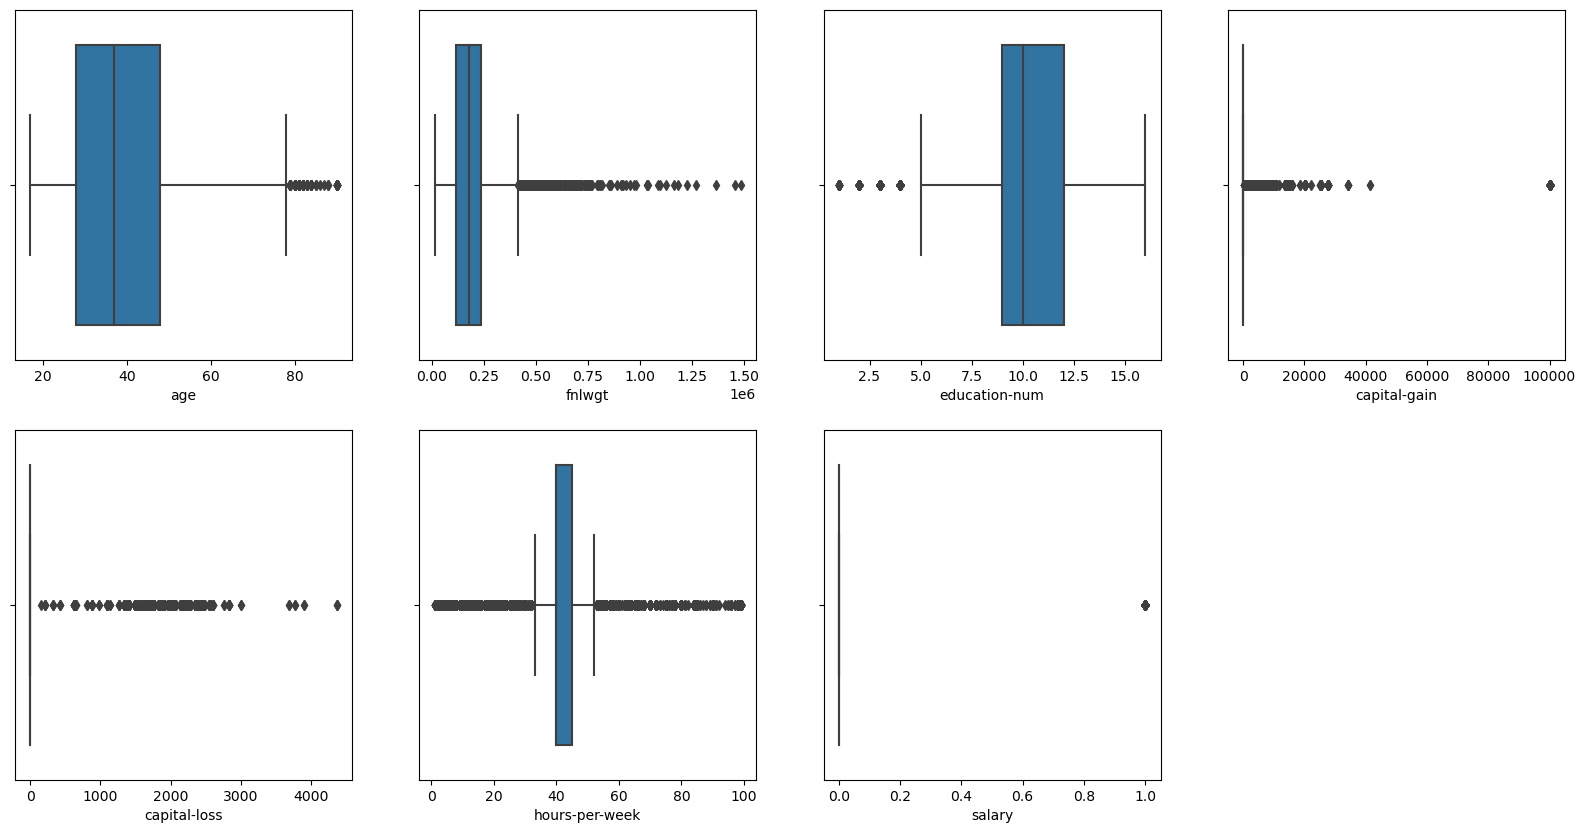

In [70]:
index=0
plt.figure(figsize=(20,10))
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.subplot(2,4,index)
    sns.boxplot(x=feature,data=df,whis=1.5)

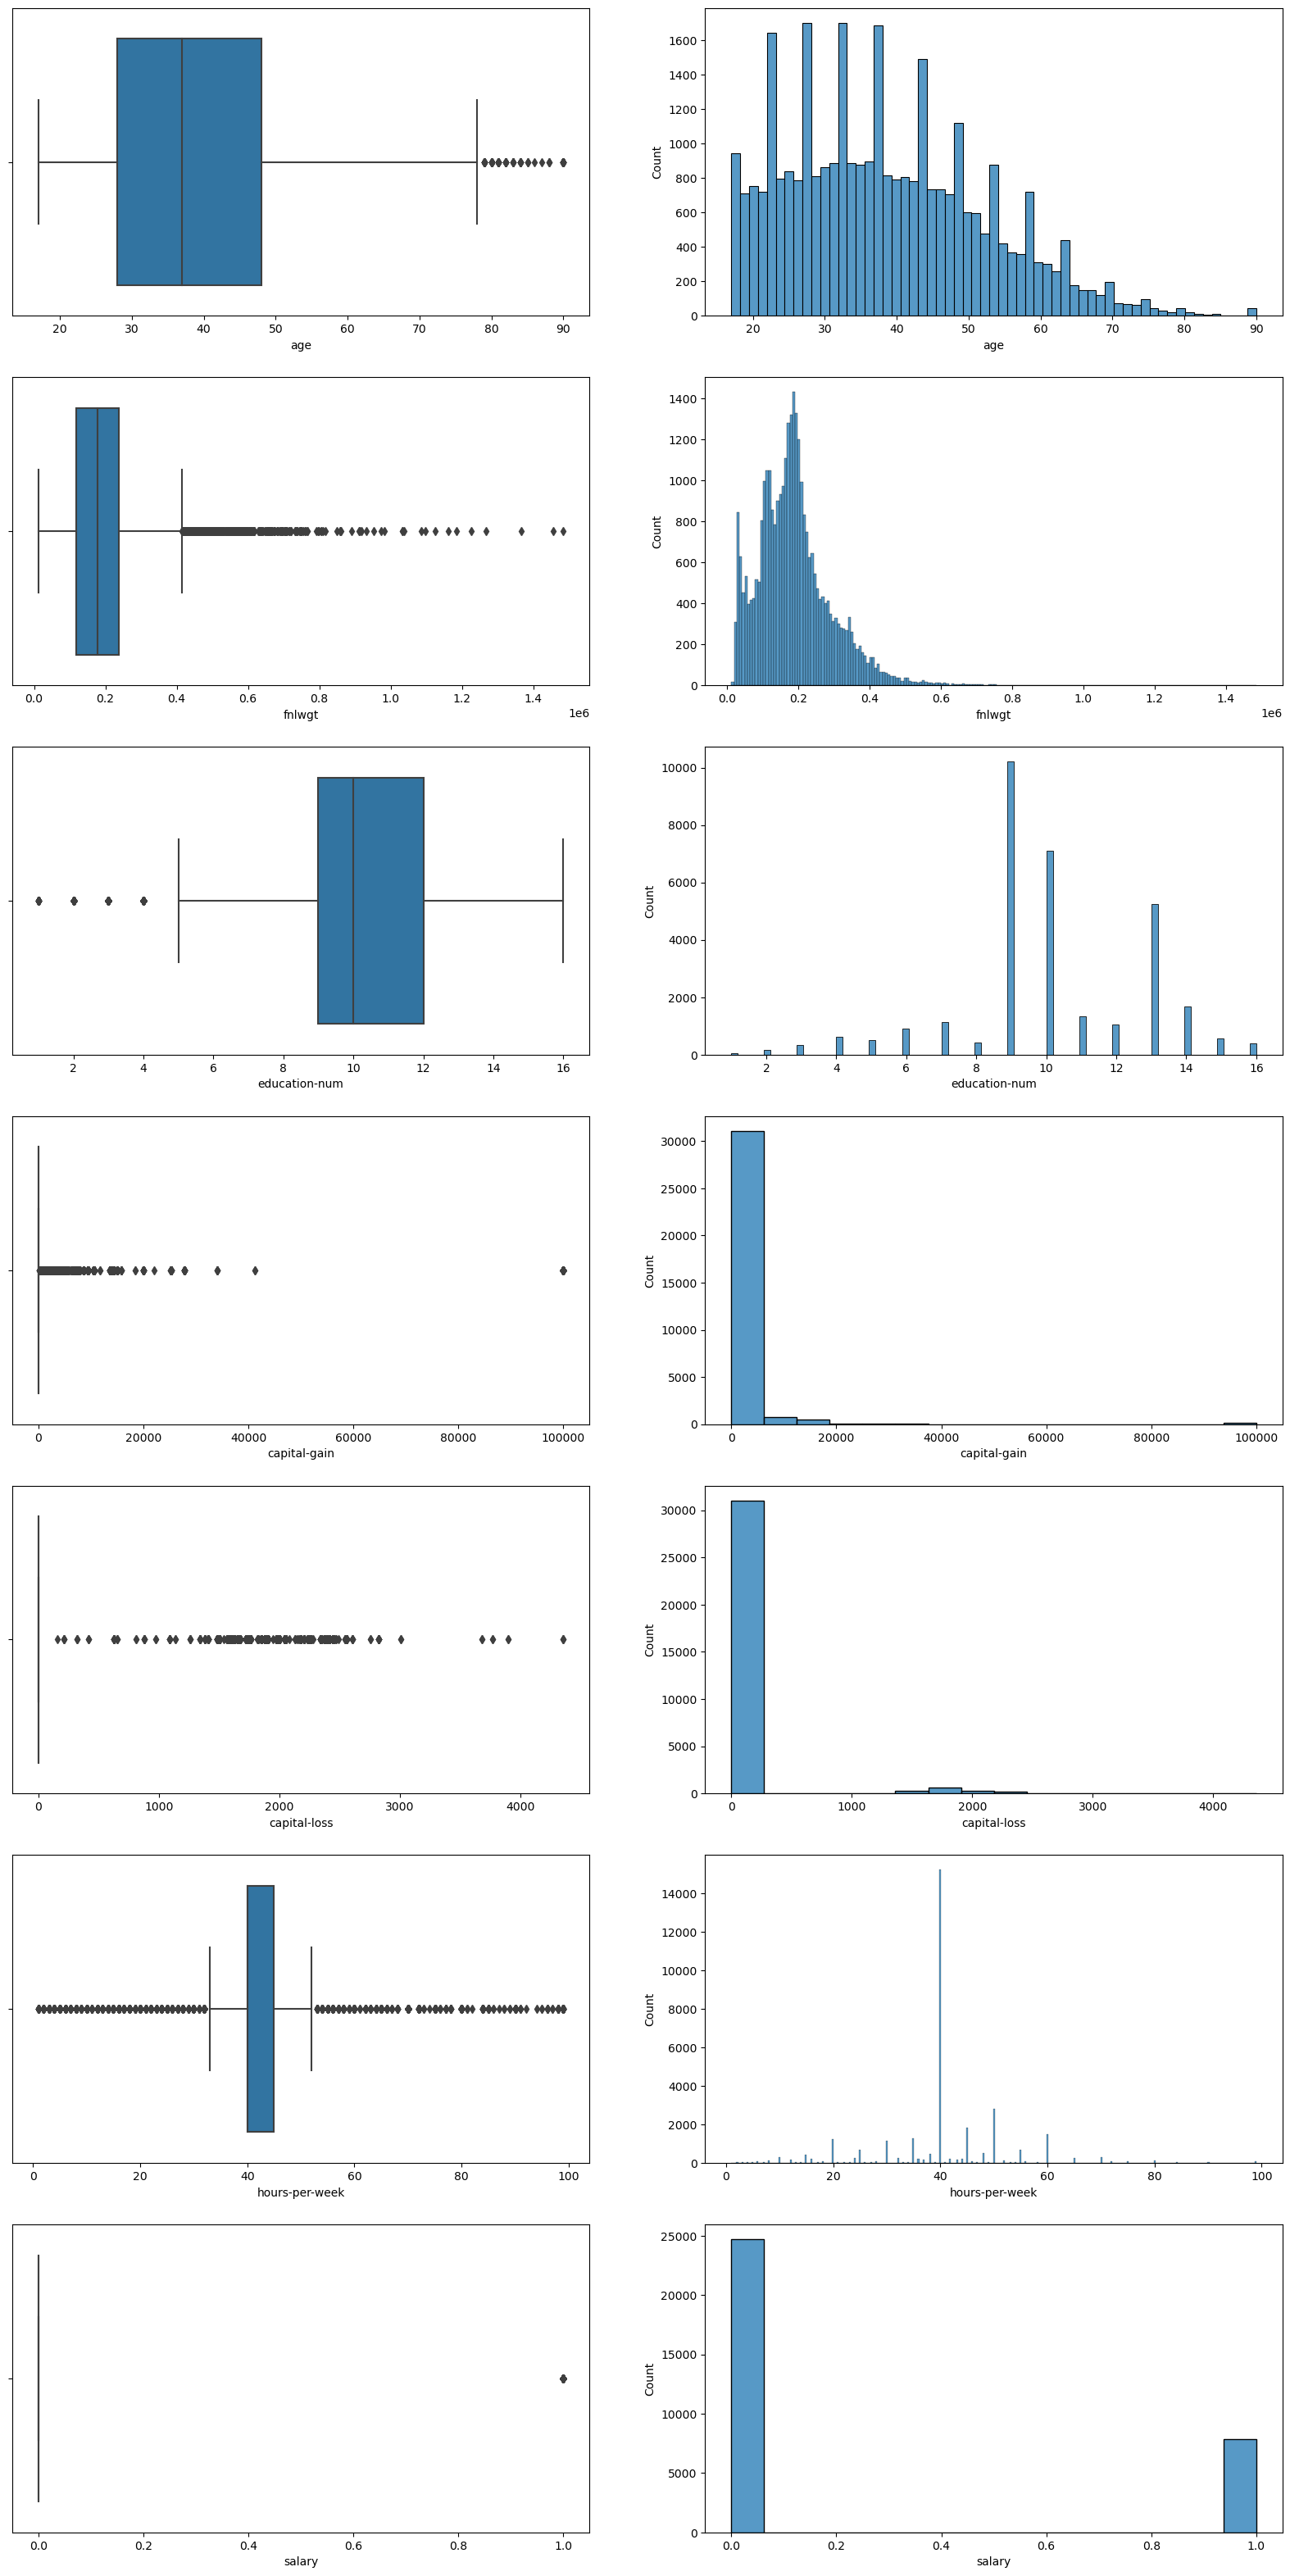

In [71]:
index=0
plt.figure(figsize=(20,40))
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.subplot(7,2,index)
    sns.boxplot(x=feature,data=df,whis=1.5) 
    index+=1
    plt.subplot(7,2,index)
    sns.histplot(x=feature,data=df) 

**After looking at the outliers you can drop the rows which actually does not make any sense**

In [72]:
df[(df.age > 78 ) & (df["hours-per-week"] > 52.5)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,10.0,Never-married,Prof-specialty,Unmarried,White,Male,0,1816,60,United-States,0
5370,90,Local-gov,227796,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,1
7481,83,Private,195507,HS-grad,9.0,Widowed,Protective-serv,Unmarried,White,Male,0,0,55,United-States,0
7720,84,Private,241065,Masters,14.0,Never-married,Prof-specialty,Unmarried,White,Male,0,0,66,United-States,0
8806,90,Private,87372,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,1
11996,90,Private,40388,Bachelors,13.0,Never-married,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,0
12830,81,Private,201398,Masters,14.0,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,0
15356,90,Private,90523,HS-grad,9.0,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,0
24395,83,Self-emp-inc,153183,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,1


In [73]:
drop_index = df[(df.age > 78 ) & (df["hours-per-week"] > 52.5)].index
drop_index

Int64Index([3777, 5370, 7481, 7720, 8806, 11996, 12830, 15356, 24395], dtype='int64')

In [74]:
df.drop(index=drop_index, inplace=True)

In [75]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,0


In [76]:
drop_index_1 = df[(df.age > 65 ) & (df["hours-per-week"] ==99)].index
drop_index_1

Int64Index([9831, 16604, 19997, 23398, 26858], dtype='int64')

In [77]:
df.drop(index=drop_index_1, inplace=True)

In [78]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,0


**How many of each race are represented in this dataset?**

In [79]:
df.race.value_counts()

White                 27802
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

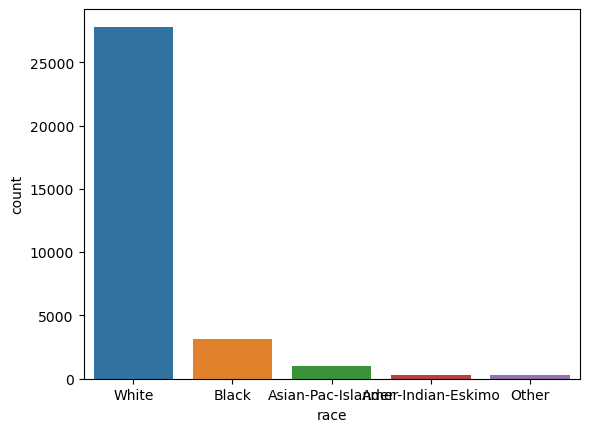

In [149]:
sns.countplot(data=df, x=df.race)
# sns.countplot(data=df, x="race")
plt.show()

**What is the average age of men/women?**

In [81]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [82]:
df.sex.value_counts()

Male      21777
Female    10770
Name: sex, dtype: int64

In [83]:
df[df.sex == "Male"]["age"].mean()

39.40919318547091

In [84]:
df[df.sex == "Female"]["age"].mean()

36.854967502321266

In [85]:
# shorter solution

df.groupby("sex")["age"].mean().round(2)

sex
Female    36.85
Male      39.41
Name: age, dtype: float64

**What is the percentage of people who have a Bachelor's degree?**

In [86]:
df.education.value_counts()

HS-grad         10499
Some-college     7290
Bachelors        5351
Masters          1719
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           644
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [87]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,0


In [88]:
5351/32547 

0.16440839401480936

In [89]:
count_bac= df[df.education == "Bachelors"].shape[0]
count_bac

5351

In [90]:
percent_bac= count_bac / df.education.shape[0] *100

In [91]:
percent_bac

16.440839401480936

In [92]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percent_bac,2)}")

The percentage of people who have a Bachelor's degree : %16.44


In [93]:
df.education.value_counts(normalize=True)["Bachelors"] * 100

16.440839401480936

**What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?**

In [94]:
advanced_edu = df[(df.education == "Bachelors") | (df.education == "Masters") | (df.education == "Doctorate")]
advanced_edu

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13.0,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,1
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32544,31,Private,199655,Masters,14.0,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,0
32553,32,Private,116138,Masters,14.0,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,0


In [95]:
#2nd way
df[df.education.isin(["Bachelors", "Masters", "Doctorate"])]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13.0,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,1
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32544,31,Private,199655,Masters,14.0,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,0
32553,32,Private,116138,Masters,14.0,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,0


In [96]:
advanced_edu.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1


In [97]:
advanced_edu[advanced_edu["salary"] == 1]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
11,30,State-gov,141297,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
19,43,Self-emp-not-inc,292175,Masters,14.0,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,1
20,40,Private,193524,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,1
32536,34,Private,160216,Bachelors,13.0,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,1
32538,38,Private,139180,Bachelors,13.0,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,1
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1


In [98]:
advanced_edu[advanced_edu["salary"] == 1].shape

(3484, 15)

In [99]:
advanced_edu[advanced_edu["salary"] == 1].shape[0]

3484

In [100]:
advanced_edu[advanced_edu["salary"] == 1].shape[0] / advanced_edu.shape[0] *100

46.558866764666575

In [101]:
advanced_edu.salary.value_counts(normalize=True) *100

0    53.441133
1    46.558867
Name: salary, dtype: float64

**What percentage of people without advanced education make more than 50K?**

In [102]:
not_advanced = df[~df.education.isin(["Bachelors", "Masters", "Doctorate"])]
not_advanced

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
6,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
10,37,Private,280464,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,Unmarried,White,Male,0,0,20,United-States,0


In [103]:
not_advanced[not_advanced["salary"] == 1].shape[0] / not_advanced.shape[0] *100

17.367539099904246

In [104]:
not_advanced.salary.value_counts(normalize=True) *100

0    82.632461
1    17.367539
Name: salary, dtype: float64

In [105]:
not_advanced.salary.value_counts(normalize=True)[1] *100

17.367539099904246

**What percentage of the people who work the minimum number of hours per week have a salary of >50K?**

In [106]:
df_less_hour= df[df["hours-per-week"] == df["hours-per-week"].min()]
df_less_hour

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,1
1036,66,Self-emp-inc,150726,9th,5.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,1409,0,1,?,0
1262,69,?,195779,Assoc-voc,11.0,Widowed,?,Unmarried,White,Female,0,0,1,United-States,0
5590,78,?,363134,HS-grad,9.0,Widowed,?,Unmarried,White,Female,0,0,1,United-States,0
5632,45,?,189564,Masters,14.0,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,0
5766,62,?,97231,Some-college,10.0,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,0
5808,76,?,211574,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,0
8447,67,?,244122,Assoc-voc,11.0,Widowed,?,Unmarried,White,Female,0,0,1,United-States,0
9147,75,?,260543,10th,6.0,Widowed,?,Unmarried,Asian-Pac-Islander,Female,0,0,1,China,0
11451,27,Private,147951,HS-grad,9.0,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,1,United-States,0


In [107]:
df_less_hour.shape

(20, 15)

In [108]:
df_less_hour[df_less_hour["salary"] ==1].shape[0] / df_less_hour.shape[0] *100

10.0

In [109]:
df_less_hour.salary.value_counts(normalize=True) *100

0    90.0
1    10.0
Name: salary, dtype: float64

In [110]:
df_less_hour.salary.value_counts(normalize=True)[1] *100

10.0

**What country has the highest percentage of people that earn >50K**

In [111]:
df.groupby("native-country")["salary"].count()

native-country
?                               581
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua    

In [112]:
high_salary = df[df.salary == 1] 
high_salary

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14.0,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
10,37,Private,280464,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
11,30,State-gov,141297,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32545,39,Local-gov,111499,Assoc-acdm,12.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,1
32554,53,Private,321865,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1


In [113]:
high_salary["native-country"].value_counts()

United-States         7167
?                      146
Philippines             61
Germany                 44
India                   40
Canada                  39
Mexico                  33
England                 30
Italy                   25
Cuba                    25
Japan                   24
Taiwan                  20
China                   20
Iran                    18
South                   16
Puerto-Rico             12
Poland                  12
France                  12
Jamaica                 10
El-Salvador              9
Greece                   8
Cambodia                 7
Hong                     6
Yugoslavia               6
Ireland                  5
Vietnam                  5
Portugal                 4
Haiti                    4
Ecuador                  4
Thailand                 3
Hungary                  3
Guatemala                3
Scotland                 3
Nicaragua                2
Trinadad&Tobago          2
Laos                     2
Columbia                 2
D

In [119]:
#1st solution

(df[df.salary == 1].groupby("native-country")["salary"].count() / df.groupby("native-country")["salary"].count()).nlargest(1)

native-country
Iran    0.418605
Name: salary, dtype: float64

In [127]:
#2nd solution

x = df[df.salary == 1]["native-country"].value_counts()
x

United-States         7167
?                      146
Philippines             61
Germany                 44
India                   40
Canada                  39
Mexico                  33
England                 30
Italy                   25
Cuba                    25
Japan                   24
Taiwan                  20
China                   20
Iran                    18
South                   16
Puerto-Rico             12
Poland                  12
France                  12
Jamaica                 10
El-Salvador              9
Greece                   8
Cambodia                 7
Hong                     6
Yugoslavia               6
Ireland                  5
Vietnam                  5
Portugal                 4
Haiti                    4
Ecuador                  4
Thailand                 3
Hungary                  3
Guatemala                3
Scotland                 3
Nicaragua                2
Trinadad&Tobago          2
Laos                     2
Columbia                 2
D

In [133]:
y = df["native-country"].value_counts()
y

United-States                 29158
Mexico                          643
?                               581
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [132]:
df[df.salary == 1].groupby("native-country")["salary"].count()


native-country
?                      146
Cambodia                 7
Canada                  39
China                   20
Columbia                 2
Cuba                    25
Dominican-Republic       2
Ecuador                  4
El-Salvador              9
England                 30
France                  12
Germany                 44
Greece                   8
Guatemala                3
Haiti                    4
Honduras                 1
Hong                     6
Hungary                  3
India                   40
Iran                    18
Ireland                  5
Italy                   25
Jamaica                 10
Japan                   24
Laos                     2
Mexico                  33
Nicaragua                2
Peru                     2
Philippines             61
Poland                  12
Portugal                 4
Puerto-Rico             12
Scotland                 3
South                   16
Taiwan                  20
Thailand                 3
Trinadad&Toba

In [148]:
a = x/y
# a.sort_values(ascending=False)
print(a.nlargest(1))

Iran    0.418605
Name: native-country, dtype: float64
